#Importing important modules

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization, ReLU, LeakyReLU
from keras.utils import to_categorical
from keras import backend as K

#Importing dataset and formatting it

In [97]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


In [98]:
train_images=train_images/255.0

In [99]:
test_images=test_images/255.0

In [101]:
train_images.shape

(60000, 28, 28)

In [102]:
K.set_image_data_format('channels_first')
img_rows, img_cols = 28, 28
train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print("Shape of training images after reshaping:", train_images.shape)
print("Shape of test images after reshaping:", test_images.shape)

Shape of training images after reshaping: (60000, 1, 28, 28)
Shape of test images after reshaping: (10000, 1, 28, 28)


#1. CNN Model

In [103]:
cnn_model=Sequential([
      Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(1,28,28)),
      MaxPooling2D(pool_size=(2,2)),
      Dropout(0.2),
      Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'),
      MaxPooling2D(pool_size=(2,2)),
      Dropout(0.2),
      Flatten(),
      Dense(124,activation='leaky_relu'),
      Dense(64,activation='leaky_relu'),
      Dropout(0.2),
      Dense(32,activation='relu'),
      Dense(10,activation='softmax')
])
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
cnn_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 26, 26)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 13, 13)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32, 13, 13)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 11, 11)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 64, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64, 5, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 124)            │       198,524 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 64)             │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,750 (889.65 KB)

 Trainable params: 227,750 (889.65 KB)

 Non-trainable params: 0 (0.00 B)

#Training the CNN model and Evaluating

In [105]:
cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6295 - loss: 0.9979 - val_accuracy: 0.8353 - val_loss: 0.4389
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8419 - loss: 0.4352 - val_accuracy: 0.8559 - val_loss: 0.3729
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8649 - loss: 0.3670 - val_accuracy: 0.8799 - val_loss: 0.3288
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8802 - loss: 0.3285 - val_accuracy: 0.8847 - val_loss: 0.3110
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8899 - loss: 0.3025 - val_accuracy: 0.8974 - val_loss: 0.2831
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8944 - loss: 0.2845 - val_accuracy: 0.9009 - val_loss: 0.2758
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9020 - loss: 0.2646 - val_accuracy: 0.9017 - val_loss: 0.2684
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9036 - loss: 0.2576 - val_accuracy: 

In [106]:
score = cnn_model.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.2665
Test loss: 0.2598961293697357
Test accuracy: 0.9035999774932861


#2. NN Model

Loading and formating the dataset

In [112]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


In [113]:
train_images=train_images/255
test_images=test_images/255

train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)
train_images.shape

(60000, 784)

In [114]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [115]:
train_labels.shape

(60000, 10)

#Declaring the model and Evalutaing

In [116]:
nn_model=Sequential([
    Dense(256,input_shape=(784,),activation='relu'),
    BatchNormalization(),
    LeakyReLU(alpha=0.05),
    Dropout(0.3),

    Dense(124),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.05),
    Dropout(0.1),

    Dense(32),
    BatchNormalization(),
    ReLU(),

    Dense(10, activation='softmax'),
])
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
nn_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 124)            │        31,868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 124)            │           496 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_18 (ReLU)                 │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 64)             │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_19 (ReLU)                 │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,142 (957.59 KB)

 Trainable params: 244,190 (953.87 KB)

 Non-trainable params: 952 (3.72 KB)

In [118]:
nn_model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6961 - loss: 0.9970 - val_accuracy: 0.8222 - val_loss: 0.4931
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8390 - loss: 0.4609 - val_accuracy: 0.8393 - val_loss: 0.4389
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8462 - loss: 0.4258 - val_accuracy: 0.8406 - val_loss: 0.4445
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8566 - loss: 0.4005 - val_accuracy: 0.8583 - val_loss: 0.3813
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8640 - loss: 0.3749 - val_accuracy: 0.8595 - val_loss: 0.3869
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8658 - loss: 0.3733 - val_accuracy: 0.8642 - val_loss: 0.3802
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8697 - loss: 0.3635 - val_accuracy: 0.8686 - val_loss: 0.3684
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8712 - loss: 0.3504 - val_accuracy: 

In [119]:
score = nn_model.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.3509
Test loss: 0.34921127557754517
Test accuracy: 0.8752999901771545


#Comparing the performance of the CNN and NN models by displaying their test accuracy and 5 sample predictions.

#Accuracy of NN model is 87% where as accuracy of CNN model is 91%, around 4% difference in terms of accuraccy.


## Prepare sample predictions



In [120]:
sample_indices = [0, 1, 2, 3, 4]
sample_images = test_images[sample_indices]
sample_true_labels = np.argmax(test_labels[sample_indices], axis=1)

## Generate and display cnn predictions



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


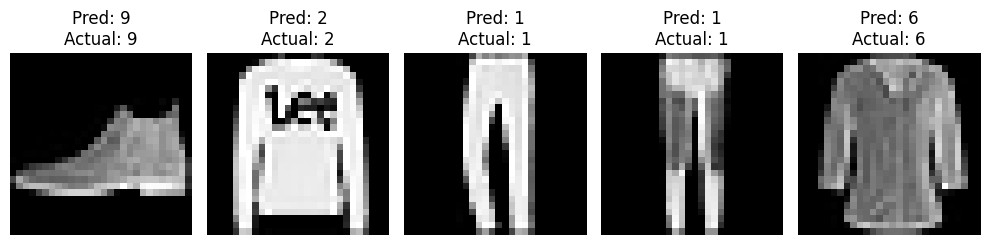

In [122]:
if K.image_data_format() == 'channels_first' and sample_images.shape[1] != 1:
    sample_images_cnn = sample_images.reshape(sample_images.shape[0], 1, img_rows, img_cols)
else:
    sample_images_cnn = sample_images

cnn_predictions = cnn_model.predict(sample_images_cnn)

cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(len(sample_indices)):
    plt.subplot(1, len(sample_indices), i + 1)
    plt.imshow(sample_images[i].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
    plt.title(f"Pred: {cnn_predicted_labels[i]}\nActual: {sample_true_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Generate and display nn predictions





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


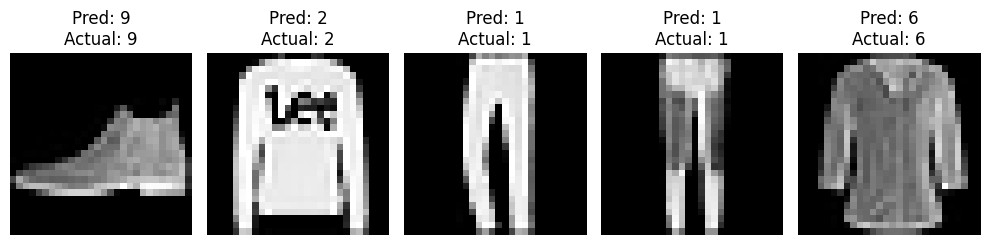

In [124]:
nn_predictions = nn_model.predict(sample_images)

nn_predicted_labels = np.argmax(nn_predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(len(sample_indices)):
    plt.subplot(1, len(sample_indices), i + 1)
    plt.imshow(sample_images[i].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
    plt.title(f"Pred: {nn_predicted_labels[i]}\nActual: {sample_true_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#plot training history



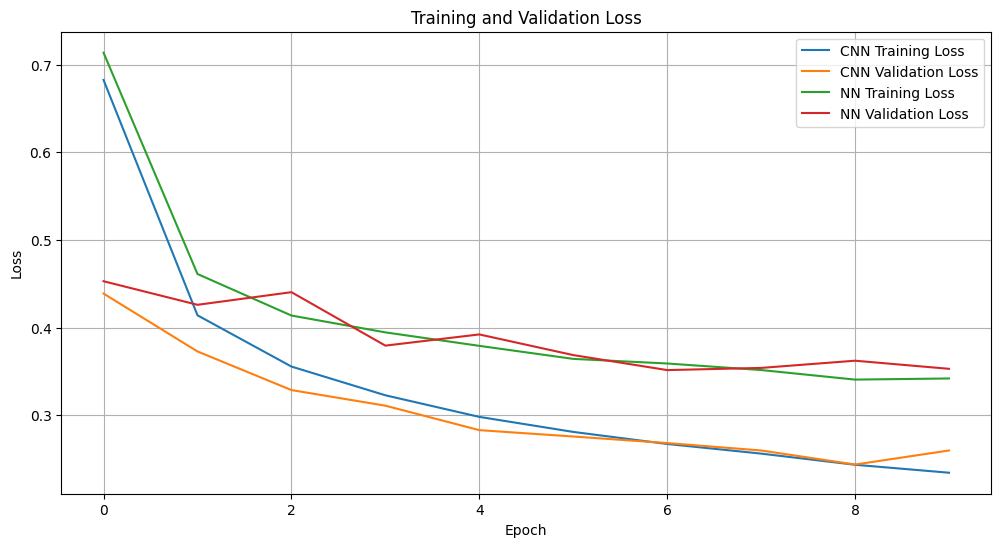

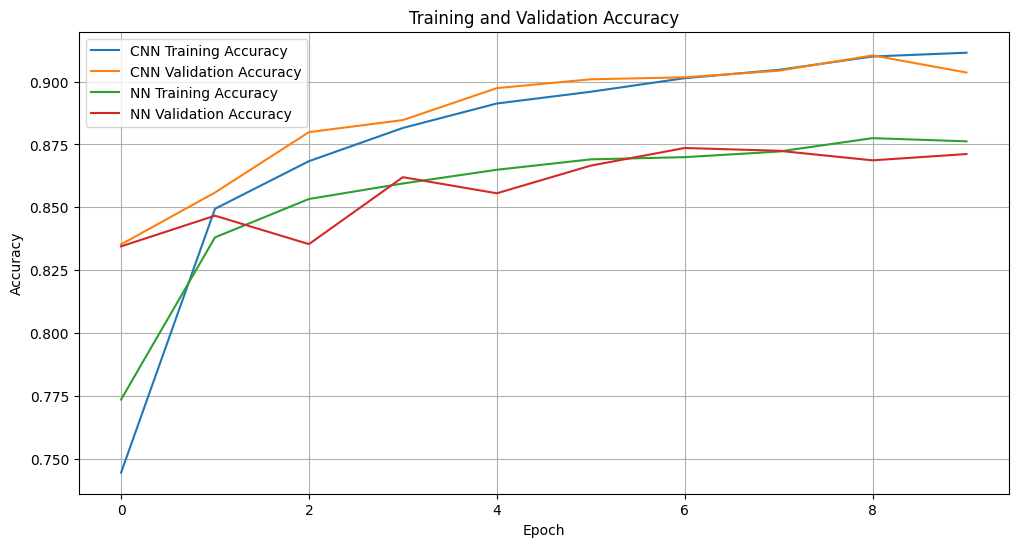

In [125]:
cnn_history = cnn_model.history.history

nn_history = nn_model_history.history

plt.figure(figsize=(12, 6))
plt.plot(cnn_history['loss'], label='CNN Training Loss')
plt.plot(cnn_history['val_loss'], label='CNN Validation Loss')
plt.plot(nn_history['loss'], label='NN Training Loss')
plt.plot(nn_history['val_loss'], label='NN Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(cnn_history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(nn_history['accuracy'], label='NN Training Accuracy')
plt.plot(nn_history['val_accuracy'], label='NN Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The CNN model achieved a test accuracy of approximately 90.74%.
*   The NN model achieved a test accuracy of approximately 87.12%.
*   Sample predictions showed that both model correctly predicted all 5 sample images.
*   The training history plots indicated that the CNN model generally achieved lower loss and higher accuracy compared to the NN model during training and validation.

